![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Método de Newton

Vamos continuar o problema de calcular a função inversa de $f(x) = x e^x$.

# Questão 1: Newton para inversão

Vamos generalizar o método de Newton para encontrar raizes de $f(x) = y$.

Inclua abaixo tanto o método de Newton, retornando **todos** os pontos percorridos até encontrar a raiz.

In [7]:
def newton_y(f, df, y, x0, xtol=1e-12, maxiter=50):
    """Calcula uma raiz aproximada de  f(x) = y  pelo método de Newton, a partir do ponto x0."""
    def fun(x):
        return f(x) - y
    pontos = []
    for _ in range(maxiter):
        pontos.append(x0)
        x1 = x0 - fun(x0)/df(x0)
        if abs(x1-x0) <= xtol:
            pontos.append(x1)
            return pontos
        x0 = x1
    return pontos

In [3]:
def f1(x):
    return x * np.log(x)

def df1(x):
    return np.log(x) + 1

pts_newton = newton_y(f1, df1, 1.1, 1)
assert abs(f1(pts_newton[-1]) - 1.1) < 1e-10

In [4]:
pts_newton = newton_y(f1, df1, 1.1, 1)

assert abs(f1(pts_newton[1]) - 1.1) > 1e-3
assert 3 < len(pts_newton) < 10

In [5]:
def f2(x):
    return x * np.sin(x)

def df2(x):
    return np.sin(x) + x * np.cos(x)

pts_newton = newton_y(f2, df2, 1.1, 1)
assert abs(f2(pts_newton[-1]) - 1.1) < 1e-10

# Questão 2: Gráficos

O método de Newton funciona bem quando a primeira derivada está suficientemente longe de zero.

## Questão 2.1: Derivada
Faça um gráfico da derivada $f'(x)$, e deduza as regiões onde o método de Newton provavelmente funciona bem,
e onde ele funciona mal.

In [6]:
def f(x):
    return x * np.exp(x)

def df(x):
    return (x+1) * np.exp(x)

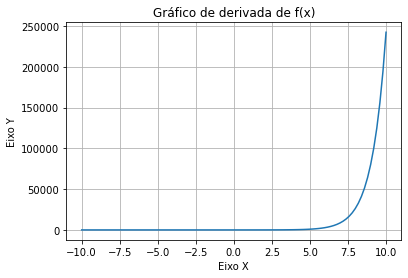

In [7]:
x = np.linspace(-10,10,100)

    
ax = plt.gca()
ax.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Gráfico de derivada de f(x)')
plt.plot(x,df(x))
plt.grid()



plt.show()

In [8]:
assert len(ax.lines) >= 1
assert len(ax.title.get_text()) > 0

In [9]:
ax = None

Em quais regiões o gráfico sugere que será difícil calcular uma raiz de $f(x) = y$?

Sabemos que será complicado calcular a raiz quando a derivada da função for igual a 0, e pelo gráfico é possivel perceber que para x < 5 a derivada já se aproxima bastante de 0.

## Questão 2.2: Número de iterações para Newton

Faça o gráfico do número de iterações necessárias para o método de Newton encontrar uma raiz de $f(x) = y$
para $y$ no intervalo $[1,100]$, e partindo de $x_0 = 1$.

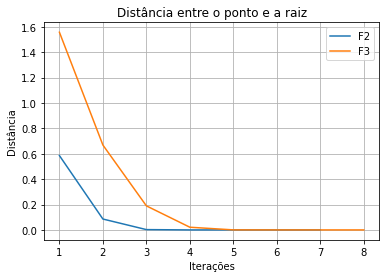

In [15]:
def f2(x):
    return x**2
def df2(x):
    return 2*x
def f3(x):
    return x**3
def df3(x):
    return 3*x**2

pts_f2 = np.array(newton_y(f2, df2, 2, 2))
pts_f3 = np.array(newton_y(f3, df3, 3, 3))


    
ax = plt.gca()
ax.set(xlabel='Iterações', ylabel='Distância',
       title='Distância entre o ponto e a raiz')

plt.plot(np.arange(1,len(pts_f2) + 1),abs(pts_f2 - np.sqrt(2)), label = 'F2')
plt.plot(np.arange(1,len(pts_f3) + 1),abs(pts_f3 - np.cbrt(3)), label = 'F3')
ax.legend()
plt.grid()



plt.show()

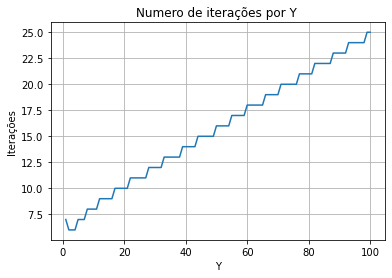

In [10]:
iteracoes = [] 
for y in range(1,101):
    pts_newton = newton_y(f, df, y, 1)
    iteracoes.append(len(pts_newton))

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Iterações',
       title='Numero de iterações por Y ')
plt.plot(np.arange(1,101),iteracoes)
plt.grid()



plt.show()

In [11]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [12]:
assert len(ax.get_xlabel()) > 0
assert len(ax.get_ylabel()) > 0

In [13]:
ydata = ax.lines[0].get_ydata()
assert 5 <= min(ydata) <= 7
assert 22 <= max(ydata) <= 30

In [14]:
ax = None

Agora, para cada $y$ (no mesmo intervalo), faça o gráfico
- da raiz encontrada; e
- do maior ponto testado pelo método de Newton,

no mesmo eixo.

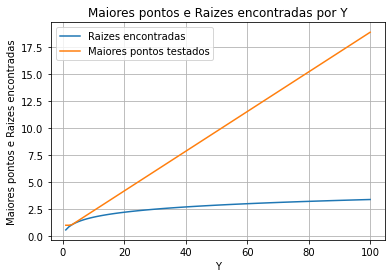

In [15]:
maiores = []
raizes = []
for y in range(1,101):
    pts_newton = newton_y(f, df, y, 1)
    raiz = pts_newton[-1]
    raizes.append(raiz)
    maior = max(pts_newton)
    maiores.append(maior)

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Maiores pontos e Raizes encontradas',
       title='Maiores pontos e Raizes encontradas por Y')

plt.plot(np.arange(1,101),raizes, label = 'Raizes encontradas')
plt.plot(np.arange(1,101),maiores, label = 'Maiores pontos testados')
ax.legend()
plt.grid()



plt.show()

In [16]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.title.get_text()) > 0

In [17]:
ax = None

Como este gráfico ajuda a explicar o anterior?

Quanto maior o y no nosso gráfico, maiores são os pontos máximos testados, e quanto maiores os pontos máximos testados, mais longe estamos da nossa raiz e precisamos de mais iterações para encontrar a raiz. E isso mostra que para para y maiores, precisamos de mais iterações.

## Questão 2.3: Outro ponto inicial

Agora, considere que o ponto inicial para encontrar uma raiz de $x e^x = y$ é $\log y$.
Quantas iterações são necessárias?

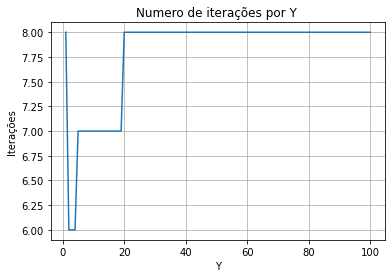

In [18]:
iteracoes = [] 
for y in range(1,101):
    pts_newton = newton_y(f, df, y, np.log(y))
    iteracoes.append(len(pts_newton))

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Iterações',
       title='Numero de iterações por Y ')
plt.plot(np.arange(1,101),iteracoes)
plt.grid()



plt.show()

In [19]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [20]:
ax = None

O que aconteceu?

É possível perceber que para log de y como ponto inicial, o método de Newton funciona muito bem, precisando apenas de poucas iterações para ser concluído. Diferente de x0 = 1, onde as iterações aumentam progressivamente, com x0 = log y, as iterações aumentam em uma escala bem mais devagar, como é possivel perceber que a partir de y = 20, as iterações ficam estagnadas em 8.

Refaça os gráficos do maior ponto e da raiz.

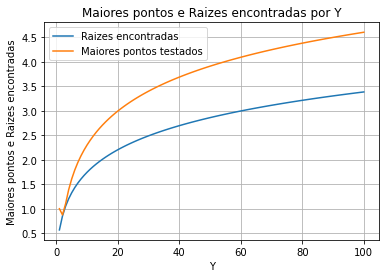

In [21]:
maiores = []
raizes = []
for y in range(1,101):
    pts_newton = newton_y(f, df, y, np.log(y))
    raiz = pts_newton[-1]
    raizes.append(raiz)
    maior = max(pts_newton)
    maiores.append(maior)

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Maiores pontos e Raizes encontradas',
       title='Maiores pontos e Raizes encontradas por Y')

plt.plot(np.arange(1,101),raizes, label = 'Raizes encontradas')
plt.plot(np.arange(1,101),maiores, label = 'Maiores pontos testados')
ax.legend()
plt.grid()



plt.show()

Como este gráfico ajuda a explicar os anteriores?

Pelo gráficos podemos analisar que diferentemente de x0 = 1, aqui os maiores pontos não crescem de forma linear, mas sim de forma logarítimica, isso faz com que eles crescam de forma mais devagar. E pela mesma lógica da explicação anterior, se estamos nos afastando menos da nossa raiz, precisaremos de menos iterações para encontra-la.

# Questão 3: Regiões difíceis

Vamos agora observar quão difícil é calcular uma raiz de $x e^x = y$ para pontos onde a derivada é praticamente nula.

## Questão 3.1: Ponto de mínimo

Faça um gráfico do número de iterações do método de Newton para calcular a raiz de $x e^x = y$ para $y$ no intervalo $[-1/e, 0]$, começando a partir de $x = 0$.

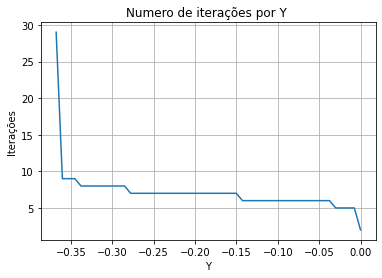

In [22]:
iteracoes = [] 
for y in np.linspace((-1/np.e),0):
    pts_newton = newton_y(f, df, y, 0)
    iteracoes.append(len(pts_newton))

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Iterações',
       title='Numero de iterações por Y ')
plt.plot(np.linspace((-1/np.e),0),iteracoes)
plt.grid()



plt.show()

In [23]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [24]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert min(vs) < 5

In [25]:
ax = None

O que você observa no gráfico?

Observamos que temos uma grande queda no início do gráfico no número de iterações, onde a derivada é quase igual a 0, e que a partir desse ponto, quando a derivada começa a alterar, as iterações caem drasticamente conforme aumentamos y.

Agora, dê um zoom na parte que dá mais iterações.

Dica: o estilo `".:"` para a linha pode ajudar a visualizar o que está acontecendo.

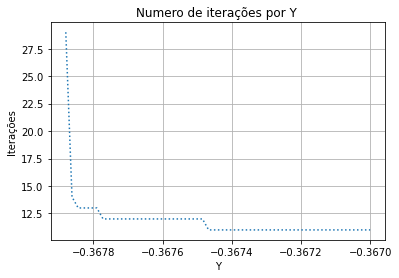

In [26]:
iteracoes = [] 
for y in np.linspace((-1/np.e),-0.3670):
    pts_newton = newton_y(f, df, y, 0)
    iteracoes.append(len(pts_newton))

    
ax = plt.gca()
ax.set(xlabel='Y', ylabel='Iterações',
       title='Numero de iterações por Y ')
plt.plot(np.linspace((-1/np.e),-0.3670),iteracoes, linestyle = ':')
plt.grid()



plt.show()

In [27]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert 10 < min(vs) < 15

In [28]:
ax = None

## Questão 3.2: Erros

Agora, vamos construir $y = z e^z$ para $z$ entre 0 e -1.
Assim, já saberemos qual a raiz de $x e^x = y$.

Com isto, faça o gráfico do **erro absoluto** entre a raiz encontrada pelo método de Newton - começando de 0, como na questão anterior - e o valor real.

<class 'numpy.ndarray'>


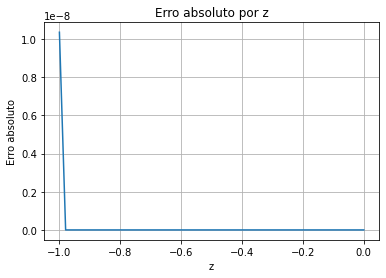

In [29]:
raizes = []
z = np.linspace(-1,0)
y = [f(z) for z in z]


for y in y:
    pts_newton = newton_y(f, df, y, 0)
    raizes.append(pts_newton[-1])
    
ax = plt.gca()
ax.set(xlabel='z', 
       ylabel='Erro absoluto',
       title='Erro absoluto por z')
print(type(z))
plt.plot(z,raizes - z)
plt.grid()



plt.show()

## Questão 3.3: Um outro ponto de vista

Vamos fazer um zoom na parte que dá maior erro.

Para poder observar bem o que acontece, vamos olhar para $z = -1 + w$, e fazer o gráfico do erro em função de $w$.

Dica: para escolher a melhor escala para os eixos, teste as diferentes combinações!

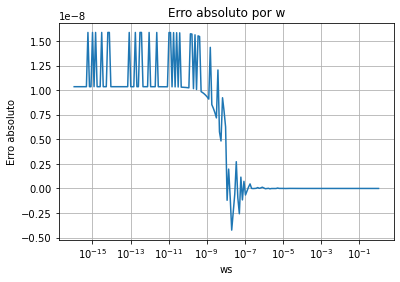

In [30]:
raizes = []
ws = np.logspace(-53,0, num=200, base=2)
zs = np.array([-1 + w for w in ws])
#print(ws)
#print(zs)
y = []
for z in zs:
    y.append(f(z))


for y in y:
    pts_newton = newton_y(f, df, y, 0)
    raizes.append(pts_newton[-1])
    
ax = plt.gca()
ax.set(xlabel='ws', 
       ylabel='Erro absoluto',
       title='Erro absoluto por w')

plt.plot(ws,raizes - zs)
plt.grid()
plt.xscale('log')


plt.show()

O que você observa?

É possivel acompanhar melhor a mudança do erro absoluto no gráfico. Quando z está próximo de -1, ou seja, com um valor de w próximo de 0, nosso erro é bem grande, mas conforme aumentamos esse valor de w, e consequentemente, aumentamos z, ficamos com nosso erro cada vez menor. Se estabilizando após o ws = 10^-7.